# DBSCAN (Density-based Spatial Clustering of Applications with Noise)

## Imports

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generating Data

In [222]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=1500, centers=[[4, 3], [2, -3], [-3, 4]], cluster_std=1)

## Plot

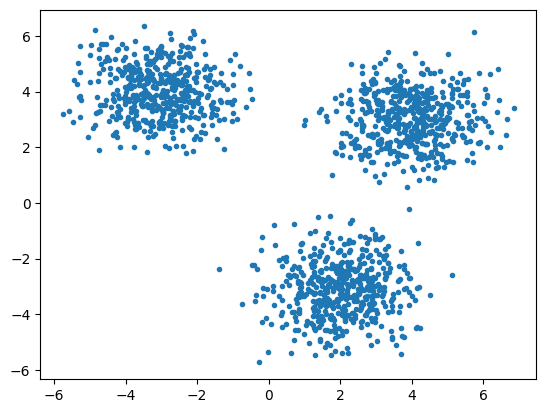

In [223]:
plt.scatter(x[:, 0], x[:, 1], marker=".")

## Standardizing Data

In [224]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x = scaler.transform(x)
x

array([[-1.49195878,  0.75882998],
       [ 0.16059846, -1.14950271],
       [ 0.82465664,  0.66016172],
       ...,
       [-1.34848425,  0.66180839],
       [-0.1256423 , -1.28903775],
       [-1.32088802,  0.87787054]], shape=(1500, 2))

## Plot Standard Data

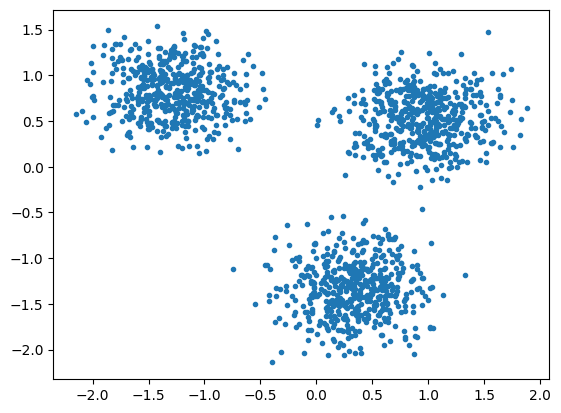

In [225]:
plt.scatter(x[:, 0], x[:, 1], marker=".")

## Modelling (Clustering)

In [226]:
from sklearn.cluster import DBSCAN

eps = 0.3   # default 0.5
min_samples = 7 # default 5


dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
dbscan.fit(x)

labels = dbscan.labels_
labels[:20]

array([0, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2])

## Distinguish Outliers (Anomaly Records)

In [227]:
core_samples_mask = np.zeros_like(labels, dtype=bool) # [False, False, ...] with the same shape as labels array
core_samples_mask[dbscan.core_sample_indices_] = True # Sets the elements of core_samples_mask corresponding to core points to True

core_samples_mask[0:20] # True: the point is "Core"; False: The point is either "Border" or "Noise"

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Cluster Count and Unique Labels

In [228]:
unique_labels = set(labels)
clusters_count = len(unique_labels) - (1 if -1 in labels else 0)

## Data Visualization

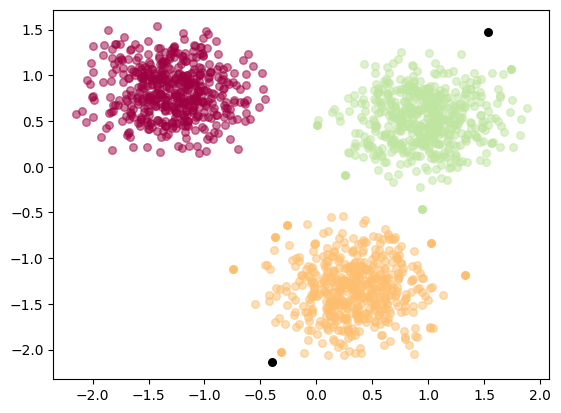

In [229]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if (label == -1): 
        color = "k"

    cluster_members_mask = (labels == label)
    
    # Clustered Datapoints
    cluster_members = x[cluster_members_mask & core_samples_mask]
    plt.scatter(cluster_members[:, 0], cluster_members[:, 1], s=30, marker="o", color=color, alpha=0.5)
    
    # Noise Datapoints
    noises = x[cluster_members_mask & ~core_samples_mask]
    plt.scatter(noises[:, 0], noises[:, 1], s=30, marker="o", color=color)

## If We Use K-Means Instead (There is No Noise Here):

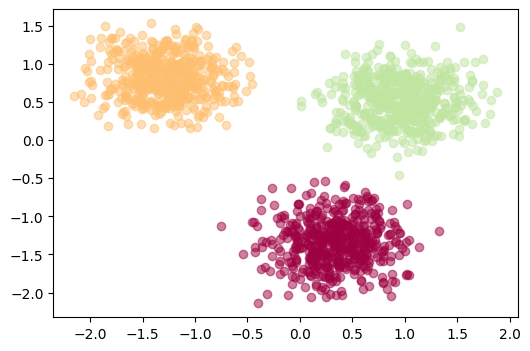

In [230]:
from sklearn.cluster import KMeans 

k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means.fit(x)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(k), colors):
    my_members = (k_means.labels_ == k)
    plt.scatter(x[my_members, 0], x[my_members, 1],  color=col, marker='o', alpha=0.5)

plt.show()

<hr>

## Reading Real Data

In [231]:
df = pd.read_csv("weather-stations20140101-20141231.csv")
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
